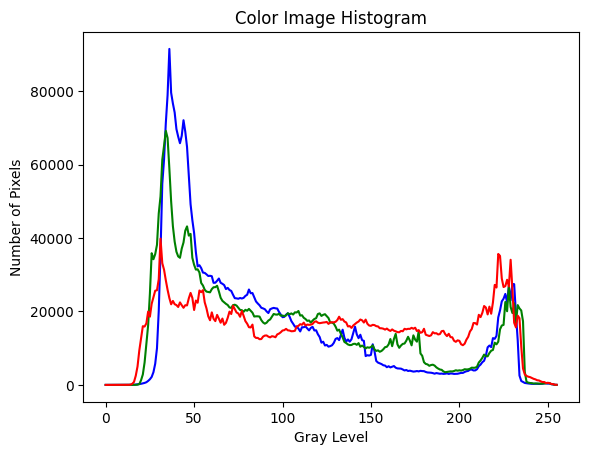

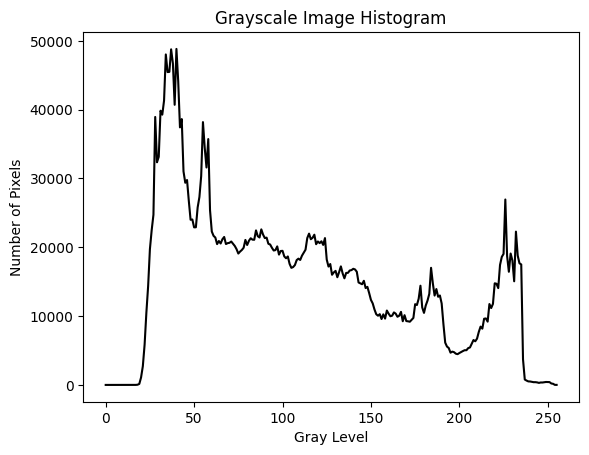

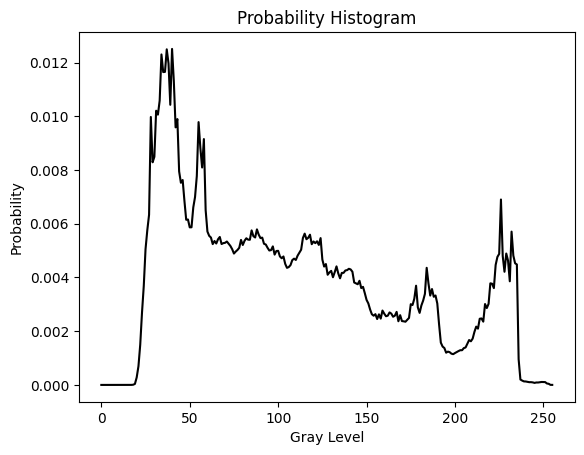

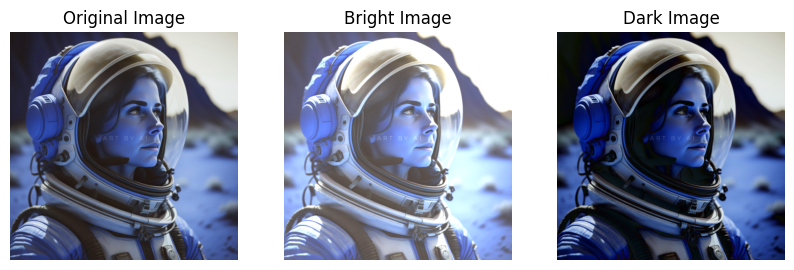

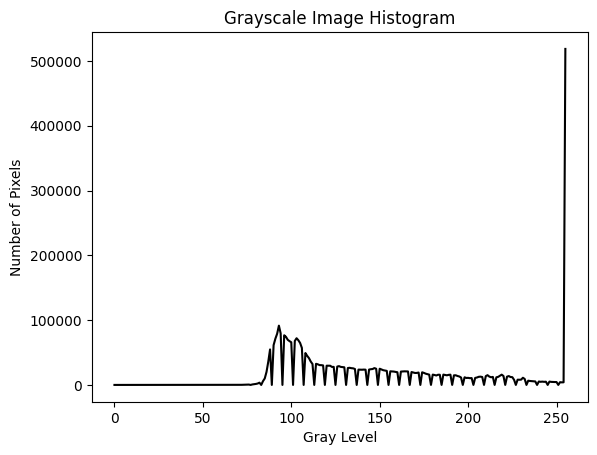

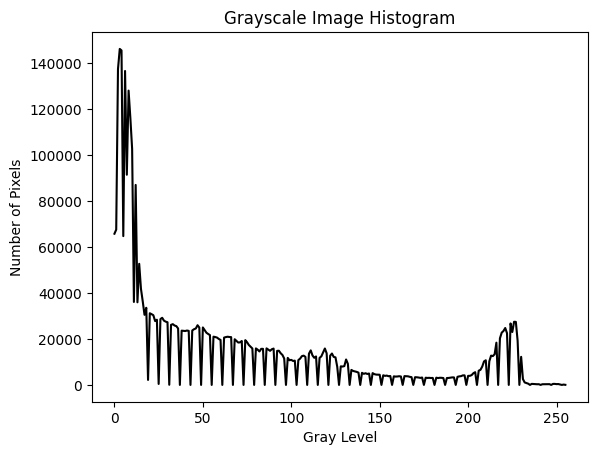

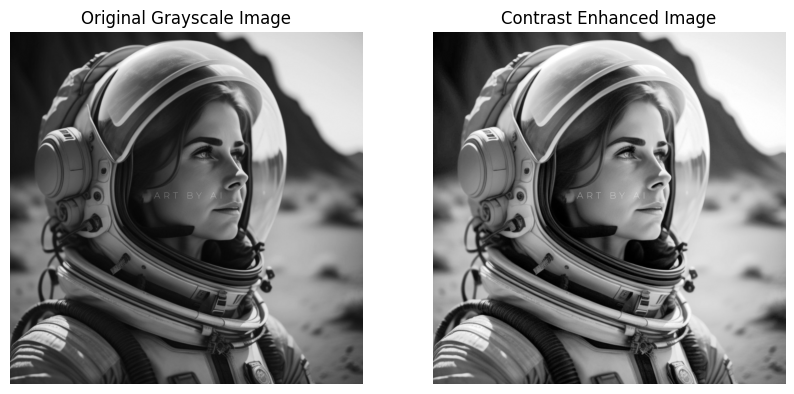

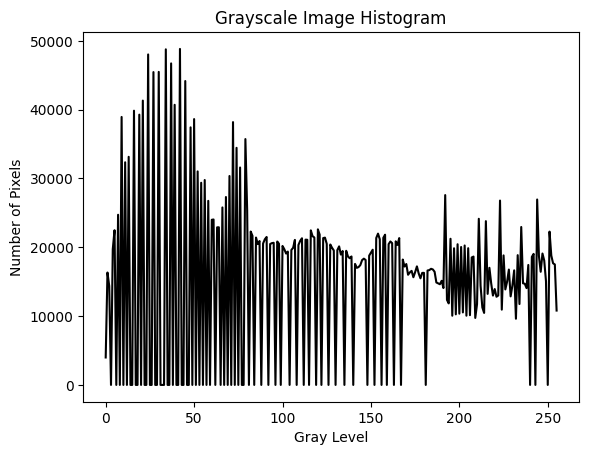

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def compute_histogram(image, color=False):
    """Compute and display histogram of an image."""
    if color:
        channels = ('b', 'g', 'r')
        for i, col in enumerate(channels):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
        plt.title("Color Image Histogram")
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
        plt.title("Grayscale Image Histogram")
    plt.xlabel("Gray Level")
    plt.ylabel("Number of Pixels")
    plt.show()
def compute_probability_histogram(image):
    """Compute and display probability histogram of an image."""
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_prob = hist / hist.sum()
    plt.plot(hist_prob, color='black')
    plt.title("Probability Histogram")
    plt.xlabel("Gray Level")
    plt.ylabel("Probability")
    plt.show()
def enhance_contrast(image):
    """Enhance contrast using histogram equalization."""
    equalized = cv2.equalizeHist(image)
    return equalized
def analyze_brightness(image):
    """Analyze histogram changes for bright and dark images."""
    bright_image = cv2.convertScaleAbs(image, alpha=1.2, beta=50)
    dark_image = cv2.convertScaleAbs(image, alpha=1.2, beta=-50)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(bright_image, cmap='gray')
    plt.title("Bright Image")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(dark_image, cmap='gray')
    plt.title("Dark Image")
    plt.axis("off")
    plt.show()
    compute_histogram(bright_image, color=False)
    compute_histogram(dark_image, color=False)
def main():
    # Load a color image
    image = cv2.imread("/content/a-mars-astronaut-in-vector-i-used-an-ai-app-to-design-a-v0-ek04rpqlelkb1.jpg")
    if image is None:
        print("Error: Image not found!")
        return
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute histograms
    compute_histogram(image, color=True)  # Color image histogram
    compute_histogram(image_gray, color=False)  # Grayscale image histogram

    # Probability histogram
    compute_probability_histogram(image_gray)

    # Contrast enhancement
    equalized_image = enhance_contrast(image_gray)

    # Analyze histogram changes for bright and dark images
    analyze_brightness(image)

    # Show results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Contrast Enhanced Image")
    plt.axis("off")

    plt.show()

    # Compute histogram of enhanced image
    compute_histogram(equalized_image, color=False)

if __name__ == "__main__":
    main()

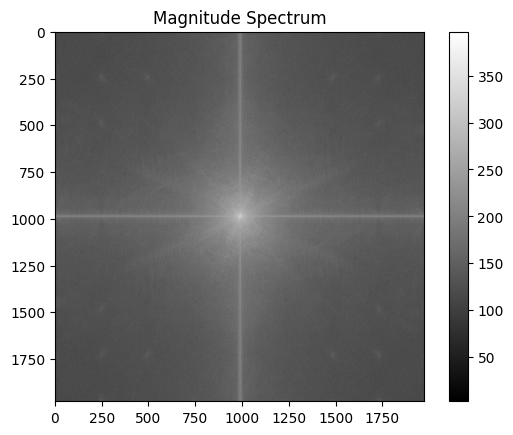

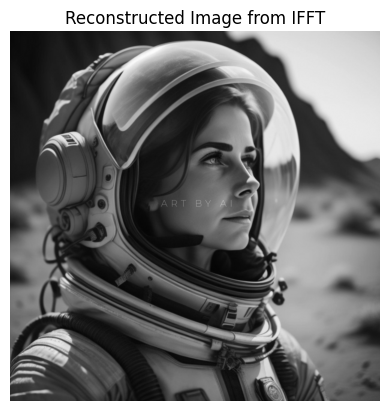

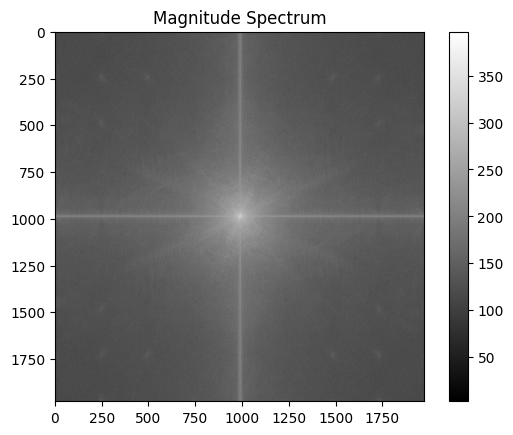

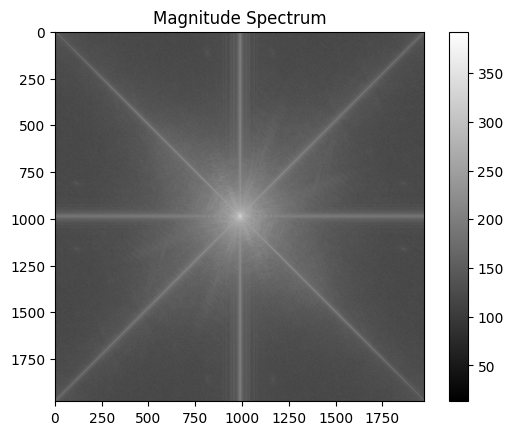

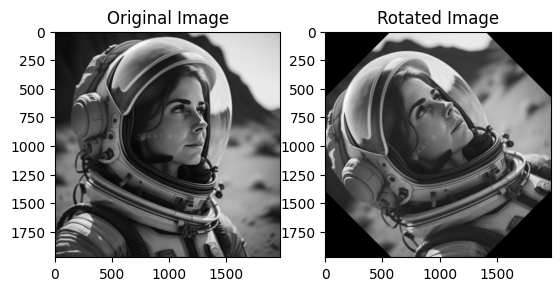

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(image):
    """Compute and display the Fourier Transform magnitude spectrum."""
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.colorbar()
    plt.show()

    return dft_shift

def compute_ifft(dft_shift):
    """Compute and display the reconstructed image using Inverse FFT."""
    f_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(f_ishift)
    img_reconstructed = np.abs(img_reconstructed)

    return img_reconstructed

def verify_rotation_property(image):
    """Verify the Rotation Property of the Fourier Transform."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))

    dft_original = compute_fft(image)
    dft_rotated = compute_fft(rotated_image)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(rotated_image, cmap='gray')
    plt.title("Rotated Image")

    plt.show()

def main():
    # Load a grayscale image
    image = cv2.imread("/content/a-mars-astronaut-in-vector-i-used-an-ai-app-to-design-a-v0-ek04rpqlelkb1.jpg", cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Image not found!")
        return

    # Perform FFT and IFFT
    dft_shift = compute_fft(image)
    reconstructed_image = compute_ifft(dft_shift)

    # Display reconstructed image
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title("Reconstructed Image from IFFT")
    plt.axis("off")
    plt.show()

    # Verify Rotation Property of Fourier Transform
    verify_rotation_property(image)

if __name__ == "__main__":
    main()